In [1]:
import pandas as pd
import numpy as np
import re
import unicodedata
import pyodbc
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\2nd Project\Luxury_Housing_Bangalore.csv")

%matplotlib inline


In [2]:
df.head(10)

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4bhk,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3Bhk,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4bhk,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4Bhk,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.
5,PROP000006,YELAHANKA,Project_5,Brigade,4290.0,4bhk,₹9.82 Cr,Secondary,HNI,2023-09-30,7.936068,NaN,Launch,Online,no,5.154027,16,Underpriced for location.
6,PROP000007,Bannerghatta Road,Project_6,Prestige,6776.0,5BHK+,10.896752354445224,Secondary,Other,2025-03-31,8.643117,8.355238,Under construction,Direct,no,9.791550,74,Too far from my office.
7,PROP000008,whitefield,Project_7,Total Environment,5763.0,3BHK,9.357538943683888,Secondary,NRI,2025-03-31,6.781306,9.565013,Under construction,Direct,yes,9.054713,31,NaN
8,PROP000009,sarjapur road,Project_8,Prestige,5815.0,3Bhk,12.299449409872416,Secondary,Other,2024-03-31,7.284164,5.580442,Under construction,NRI Desk,yes,8.552046,68,NaN
9,PROP000010,JP NAGAR,Project_9,Puravankara,8675.0,4Bhk,9.193310278863123,Primary,CXO,2023-09-30,9.964399,7.759907,Launch,Direct,yes,8.395691,18,Too far from my office.


In [3]:
df.dtypes


Property_ID              object
Micro_Market             object
Project_Name             object
Developer_Name           object
Unit_Size_Sqft          float64
Configuration            object
Ticket_Price_Cr          object
Transaction_Type         object
Buyer_Type               object
Purchase_Quarter         object
Connectivity_Score      float64
Amenity_Score           float64
Possession_Status        object
Sales_Channel            object
NRI_Buyer                object
Locality_Infra_Score    float64
Avg_Traffic_Time_Min      int64
Buyer_Comments           object
dtype: object

In [4]:
df.columns

Index(['Property_ID', 'Micro_Market', 'Project_Name', 'Developer_Name',
       'Unit_Size_Sqft', 'Configuration', 'Ticket_Price_Cr',
       'Transaction_Type', 'Buyer_Type', 'Purchase_Quarter',
       'Connectivity_Score', 'Amenity_Score', 'Possession_Status',
       'Sales_Channel', 'NRI_Buyer', 'Locality_Infra_Score',
       'Avg_Traffic_Time_Min', 'Buyer_Comments'],
      dtype='object')

In [5]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
100995     True
100996     True
100997     True
100998     True
100999     True
Length: 101000, dtype: bool

In [6]:
df.shape

(101000, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           101000 non-null  object 
 1   Micro_Market          101000 non-null  object 
 2   Project_Name          101000 non-null  object 
 3   Developer_Name        101000 non-null  object 
 4   Unit_Size_Sqft        90954 non-null   float64
 5   Configuration         101000 non-null  object 
 6   Ticket_Price_Cr       90981 non-null   object 
 7   Transaction_Type      101000 non-null  object 
 8   Buyer_Type            101000 non-null  object 
 9   Purchase_Quarter      101000 non-null  object 
 10  Connectivity_Score    101000 non-null  float64
 11  Amenity_Score         90910 non-null   float64
 12  Possession_Status     101000 non-null  object 
 13  Sales_Channel         101000 non-null  object 
 14  NRI_Buyer             101000 non-null  object 
 15  

In [8]:
df.describe()

,Unit_Size_Sqft,Connectivity_Score,Amenity_Score,Locality_Infra_Score,Avg_Traffic_Time_Min
count,90954.000000,101000.000000,90910.000000,101000.000000,101000.000000
mean,5972.274765,6.992619,7.503663,7.498426,67.182921
std,1783.397836,1.731757,1.440758,1.443128,30.271611
min,-1.000000,4.000031,5.000224,5.000013,15.000000
25%,4477.250000,5.494526,6.260329,6.247954,41.000000
50%,5990.000000,6.985805,7.499123,7.495614,67.000000
75%,7497.000000,8.490000,8.752207,8.749824,93.000000
max,8999.000000,9.999970,9.999865,9.999956,119.000000


In [9]:
df.isnull().sum().sum()

np.int64(48442)

In [10]:
df.isnull().sum()

Property_ID                 0
Micro_Market                0
Project_Name                0
Developer_Name              0
Unit_Size_Sqft          10046
Configuration               0
Ticket_Price_Cr         10019
Transaction_Type            0
Buyer_Type                  0
Purchase_Quarter            0
Connectivity_Score          0
Amenity_Score           10090
Possession_Status           0
Sales_Channel               0
NRI_Buyer                   0
Locality_Infra_Score        0
Avg_Traffic_Time_Min        0
Buyer_Comments          18287
dtype: int64

In [11]:
df_copy=df.copy()

In [12]:
dupes = df_copy.duplicated()
sum(dupes)

1000

In [13]:
dupes = df_copy.drop_duplicates(inplace=True)


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Property_ID           100000 non-null  object 
 1   Micro_Market          100000 non-null  object 
 2   Project_Name          100000 non-null  object 
 3   Developer_Name        100000 non-null  object 
 4   Unit_Size_Sqft        90043 non-null   float64
 5   Configuration         100000 non-null  object 
 6   Ticket_Price_Cr       90087 non-null   object 
 7   Transaction_Type      100000 non-null  object 
 8   Buyer_Type            100000 non-null  object 
 9   Purchase_Quarter      100000 non-null  object 
 10  Connectivity_Score    100000 non-null  float64
 11  Amenity_Score         90000 non-null   float64
 12  Possession_Status     100000 non-null  object 
 13  Sales_Channel         100000 non-null  object 
 14  NRI_Buyer             100000 non-null  object 
 15  Locali

In [15]:
df_copy['Ticket_Price_Cr'].astype(str).str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: Ticket_Price_Cr, Length: 100000, dtype: bool

In [16]:
df_copy['Ticket_Price_Cr'].unique()

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       ..., '13.730178633219271', '10.363988981166342',
       '10.415616832095246'], shape=(72855,), dtype=object)

In [17]:
df_copy['Ticket_Price_Cr'].unique()[:20]

array(['12.750846039118798', '16.292151871065954', '10.517724412961911',
       '9.396367494232896', '15.345392444511946', '₹9.82 Cr',
       '10.896752354445224', '9.357538943683888', '12.299449409872416',
       '9.193310278863123', '15.221823819949362', '7.384787238631023',
       '11.042463301181789', '15.166285271789972', '13.851563178884089',
       '70.0', '9.750864804838619', '9.045289663266425',
       '7.623657466155216', '9.627966273140629'], dtype=object)

In [18]:
df_copy['Ticket_Price_Cr'] = (df_copy['Ticket_Price_Cr'].astype(str).str.replace(r'[^0-9\.]', '', regex=True).replace('', np.nan).astype(float))


In [19]:
df_copy['Micro_Market'] = df_copy['Micro_Market'].astype(str).str.lower()
df_copy['Developer_Name'] = df_copy['Developer_Name'].astype(str).str.lower()

In [20]:
if 'Developer_Name' in df_copy.columns:
    df_copy = df_copy.rename(columns={'Developer_Name': 'Builder'})

In [21]:
df_copy['Purchase_Quarter'] = pd.to_datetime(df_copy['Purchase_Quarter'], dayfirst=True,errors='coerce')


C:\Users\HP\AppData\Local\Temp\ipykernel_6316\339387103.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_copy['Purchase_Quarter'] = pd.to_datetime(df_copy['Purchase_Quarter'], dayfirst=True,errors='coerce')


In [22]:
df_copy.head()

,Property_ID,Micro_Market,Project_Name,Builder,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,sarjapur road,Project_0,rmz,4025.0,4bhk,12.750846,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,indiranagar,Project_1,puravankara,5760.0,3Bhk,16.292152,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,bannerghatta road,Project_2,tata housing,7707.0,4bhk,10.517724,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,embassy,6192.0,3BHK,9.396367,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,koramangala,Project_4,snn raj,7147.0,4Bhk,15.345392,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


In [23]:
df_copy['Day'] = df_copy['Purchase_Quarter'].dt.day
df_copy['Month'] = df_copy['Purchase_Quarter'].dt.month
df_copy['Year'] = df_copy['Purchase_Quarter'].dt.year
df_copy['Quarter'] = df_copy['Purchase_Quarter'].dt.quarter

In [24]:
df_copy.head(5)

,Property_ID,Micro_Market,Project_Name,Builder,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Day,Month,Year,Quarter
0,PROP000001,sarjapur road,Project_0,rmz,4025.0,4bhk,12.750846,Primary,NRI,2025-03-31,...,Launch,Broker,yes,9.212491,18,Loved the amenities!,31,3,2025,1
1,PROP000002,indiranagar,Project_1,puravankara,5760.0,3Bhk,16.292152,Primary,Other,2024-06-30,...,Under construction,NRI Desk,no,7.723898,106,NaN,30,6,2024,2
2,PROP000003,bannerghatta road,Project_2,tata housing,7707.0,4bhk,10.517724,Primary,HNI,2023-12-31,...,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.,31,12,2023,4
3,PROP000004,bellary road,Project_3,embassy,6192.0,3BHK,9.396367,Primary,HNI,2024-03-31,...,Ready to move,Online,yes,6.100929,106,Excellent location!,31,3,2024,1
4,PROP000005,koramangala,Project_4,snn raj,7147.0,4Bhk,15.345392,Secondary,HNI,2024-12-31,...,Under construction,Broker,no,5.312510,18,Too far from my office.,31,12,2024,4


In [25]:
numeric_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

In [26]:
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 11 numerical features : ['Unit_Size_Sqft', 'Ticket_Price_Cr', 'Purchase_Quarter', 'Connectivity_Score', 'Amenity_Score', 'Locality_Infra_Score', 'Avg_Traffic_Time_Min', 'Day', 'Month', 'Year', 'Quarter']

We have 11 categorical features : ['Property_ID', 'Micro_Market', 'Project_Name', 'Builder', 'Configuration', 'Transaction_Type', 'Buyer_Type', 'Possession_Status', 'Sales_Channel', 'NRI_Buyer', 'Buyer_Comments']


In [27]:
for col in categorical_features:
    print(df_copy[col].value_counts(normalize=True)*100)
    print('---------------------------')

Property_ID
PROP000001    0.001
PROP000002    0.001
PROP000003    0.001
PROP000004    0.001
PROP000005    0.001
              ...  
PROP099996    0.001
PROP099997    0.001
PROP099998    0.001
PROP099999    0.001
PROP100000    0.001
Name: proportion, Length: 100000, dtype: float64
---------------------------
Micro_Market
jayanagar            6.379
bannerghatta road    6.374
jp nagar             6.373
sarjapur road        6.373
mg road              6.284
whitefield           6.268
indiranagar          6.263
kanakapura road      6.235
bellary road         6.215
yelahanka            6.213
electronic city      6.212
rajajinagar          6.207
domlur               6.181
hebbal               6.172
hennur road          6.158
koramangala          6.093
Name: proportion, dtype: float64
---------------------------
Project_Name
Project_0      0.2
Project_1      0.2
Project_2      0.2
Project_3      0.2
Project_4      0.2
              ... 
Project_495    0.2
Project_496    0.2
Project_497    0.2
P

C:\Users\HP\AppData\Local\Temp\ipykernel_6316\2655216913.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_6316\2655216913.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_6316\2655216913.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
C:\Users\HP\AppData\Local\Temp\ipykernel_6316\2655216913.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill

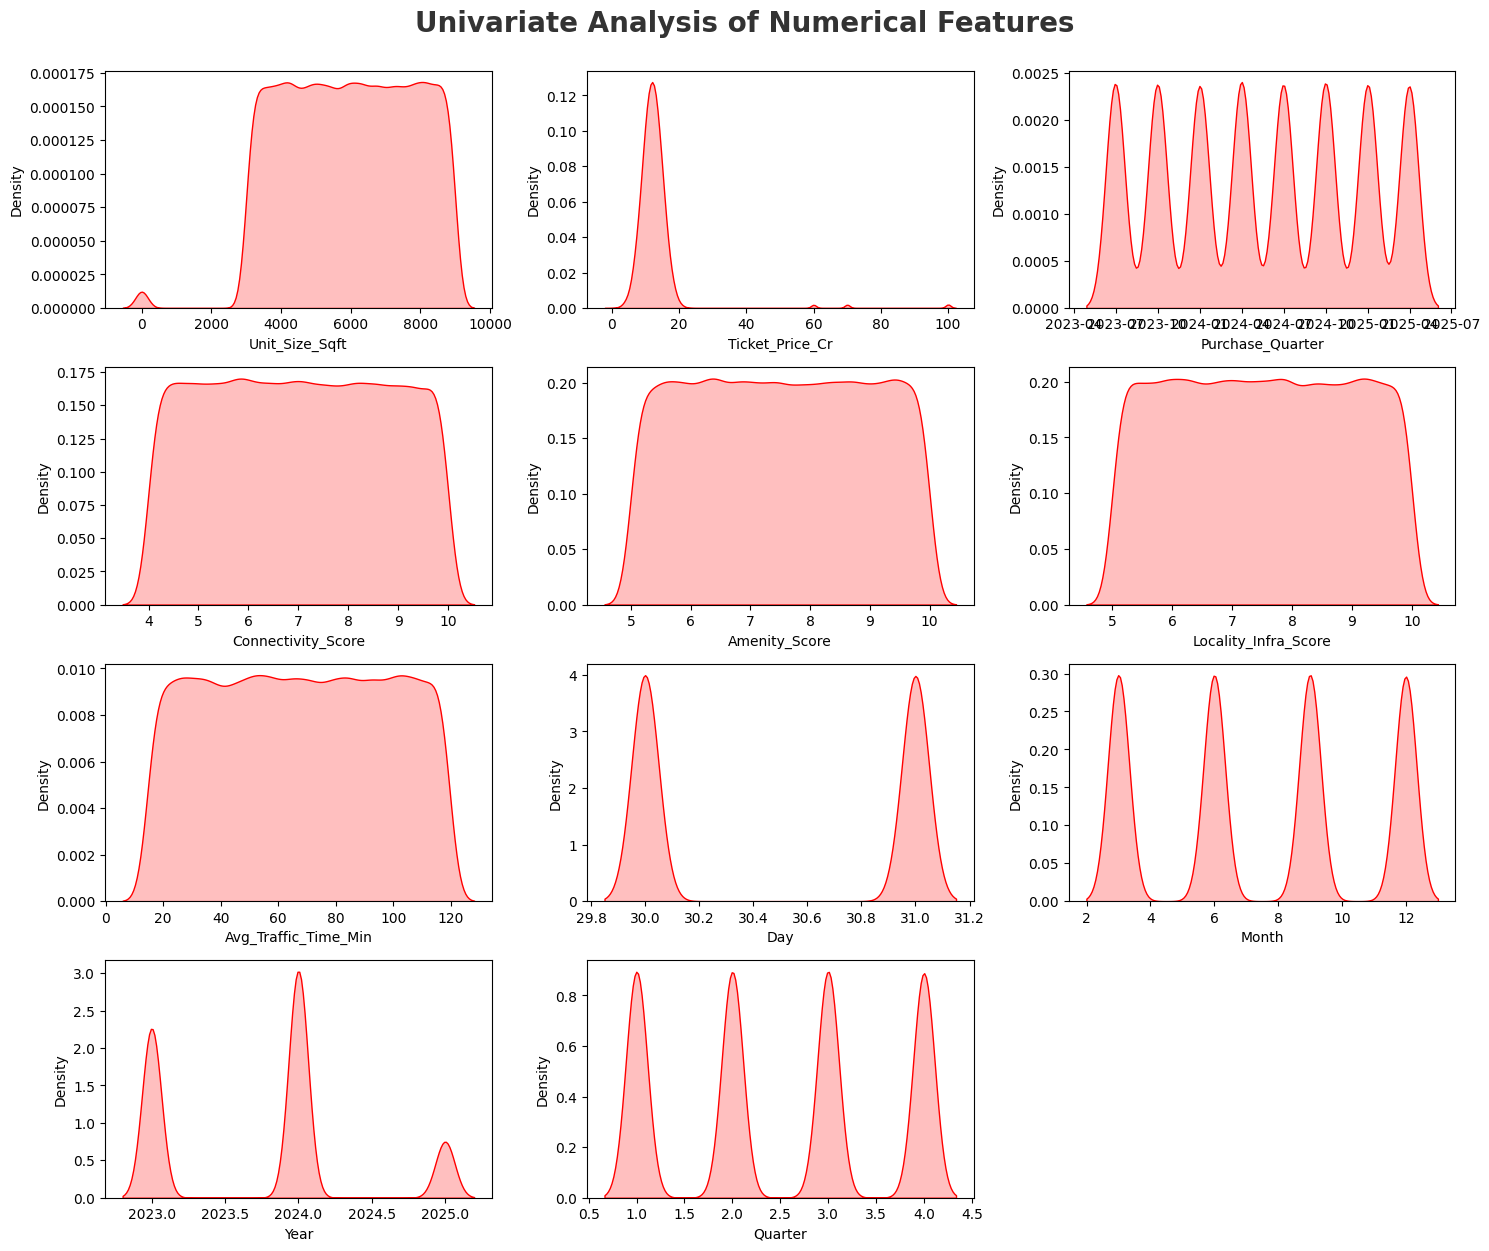

In [28]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Property_ID           100000 non-null  object        
 1   Micro_Market          100000 non-null  object        
 2   Project_Name          100000 non-null  object        
 3   Builder               100000 non-null  object        
 4   Unit_Size_Sqft        90043 non-null   float64       
 5   Configuration         100000 non-null  object        
 6   Ticket_Price_Cr       90087 non-null   float64       
 7   Transaction_Type      100000 non-null  object        
 8   Buyer_Type            100000 non-null  object        
 9   Purchase_Quarter      100000 non-null  datetime64[ns]
 10  Connectivity_Score    100000 non-null  float64       
 11  Amenity_Score         90000 non-null   float64       
 12  Possession_Status     100000 non-null  object        
 13  Sales

In [30]:
Q1 = df_copy['Unit_Size_Sqft'].quantile(0.25)
Q3 = df_copy['Unit_Size_Sqft'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_copy[df_copy['Unit_Size_Sqft'] < lower]

,Property_ID,Micro_Market,Project_Name,Builder,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,...,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments,Day,Month,Year,Quarter


In [31]:


def handle_outliers(df_copy, col):
    Q1 = df_copy[col].quantile(0.25)
    Q3 = df_copy[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    print(f"\nColumn: {col}")
    print(f"Lower bound = {lower}")
    print(f"Upper bound = {upper}")
    print(f"Outliers removed = {df_copy[(df_copy[col] < lower) | (df_copy[col] > upper)].shape[0]} rows")
    
    # convert outliers → NaN
    df_copy.loc[(df_copy[col] < lower) | (df_copy[col] > upper), col] = np.nan


In [32]:
cols = ['Ticket_Price_Cr', 'Unit_Size_Sqft', 'Amenity_Score','Unit_Size_Sqft']

for c in cols:
    handle_outliers(df_copy, c)



Column: Ticket_Price_Cr
Lower bound = 3.8819095508112405
Upper bound = 20.226069061631318
Outliers removed = 1557 rows

Column: Unit_Size_Sqft
Lower bound = -50.5
Upper bound = 12025.5
Outliers removed = 0 rows

Column: Amenity_Score
Lower bound = 2.5250357815338553
Upper bound = 12.488658065239488
Outliers removed = 0 rows

Column: Unit_Size_Sqft
Lower bound = -50.5
Upper bound = 12025.5
Outliers removed = 0 rows


In [33]:
df_copy['Ticket_Price_Cr'] = df_copy['Ticket_Price_Cr'].fillna(df_copy['Ticket_Price_Cr'].median())
df_copy['Amenity_Score'] = df_copy['Amenity_Score'].fillna(df_copy['Amenity_Score'].median())
df_copy['Unit_Size_Sqft'] = df_copy['Unit_Size_Sqft'].fillna(df_copy['Unit_Size_Sqft'].median())
df_copy['Buyer_Comments'] = df_copy['Buyer_Comments'].fillna("No Comment")

In [34]:
df_copy['Buyer_Comments'].value_counts(dropna=False)


Buyer_Comments
No Comment                     18099
Great value for money.          9283
Too far from my office.         9218
Connectivity is poor.           9216
Excellent location!             9157
Great view from 15th floor.     9099
Loved the amenities!            9027
Agent was not responsive.       9019
Underpriced for location.       8982
Will buy after possession.      8900
Name: count, dtype: int64

In [35]:
booked_comments = [
    "Loved the amenities!",
    "Excellent location!",
    "Great value for money.",
    "Great view from 15th floor.",
    "Underpriced for location."
]

pending_comments = [
    "Will buy after possession."
]

df_copy['Booking_Status'] = np.select(
    [
        df_copy['Buyer_Comments'].isin(booked_comments),
        df_copy['Buyer_Comments'].isin(pending_comments)
    ],
    [
        'Booked',
        'Pending'
    ],
    default='Not Booked'
)

In [36]:
df_copy['Micro_Market'].sum()

'sarjapur roadindiranagarbannerghatta roadbellary roadkoramangalayelahankabannerghatta roadwhitefieldsarjapur roadjp nagarrajajinagarsarjapur roadkoramangalakoramangalayelahankawhitefieldindiranagaryelahankayelahankarajajinagarjayanagarwhitefielddomluryelahankamg roadhennur roadjayanagardomlurelectronic citymg roadwhitefieldhebbalmg roadjp nagarjayanagarbannerghatta roadmg roadkanakapura roadhebbalkoramangalakoramangalabellary roadjp nagarelectronic citymg roadmg roadelectronic citybellary roadhennur roadhennur roadbellary roadhennur roadrajajinagarmg roadsarjapur roadindiranagarelectronic citykanakapura roadrajajinagarwhitefieldrajajinagarsarjapur roadwhitefieldkanakapura roadsarjapur roaddomlurindiranagarkanakapura roadmg roadhennur roaddomlurjp nagarkanakapura roadjp nagarwhitefielddomlurindiranagarmg roadbellary roadmg roadsarjapur roadmg roadbannerghatta roadyelahankabellary roadrajajinagarhennur roadhebbalindiranagardomluryelahankaindiranagardomlurhennur roadjayanagarjayanagarjp 

In [37]:
df_copy['Booking_Flag'] = np.where(df_copy['Booking_Status'] == 'Booked', 1, 0)


In [38]:
df_copy[['Booking_Flag']].value_counts()

Booking_Flag
0               54452
1               45548
Name: count, dtype: int64

In [39]:
print(df_copy.isnull().sum())

Property_ID             0
Micro_Market            0
Project_Name            0
Builder                 0
Unit_Size_Sqft          0
Configuration           0
Ticket_Price_Cr         0
Transaction_Type        0
Buyer_Type              0
Purchase_Quarter        0
Connectivity_Score      0
Amenity_Score           0
Possession_Status       0
Sales_Channel           0
NRI_Buyer               0
Locality_Infra_Score    0
Avg_Traffic_Time_Min    0
Buyer_Comments          0
Day                     0
Month                   0
Year                    0
Quarter                 0
Booking_Status          0
Booking_Flag            0
dtype: int64


In [40]:
df_copy.to_csv(r"C:\Users\HP\OneDrive\Desktop\Guvi\2nd Project\Cleaned_luxury_Housing_Bangalore.csv", index=False)


In [41]:
df['Configuration']  = df['Configuration'].str.strip().str.upper()

In [48]:
df.head()

,Property_ID,Micro_Market,Project_Name,Developer_Name,Unit_Size_Sqft,Configuration,Ticket_Price_Cr,Transaction_Type,Buyer_Type,Purchase_Quarter,Connectivity_Score,Amenity_Score,Possession_Status,Sales_Channel,NRI_Buyer,Locality_Infra_Score,Avg_Traffic_Time_Min,Buyer_Comments
0,PROP000001,Sarjapur Road,Project_0,RMZ,4025.0,4BHK,12.750846039118798,Primary,NRI,2025-03-31,7.990091,5.462863,Launch,Broker,yes,9.212491,18,Loved the amenities!
1,PROP000002,Indiranagar,Project_1,Puravankara,5760.0,3BHK,16.292151871065954,Primary,Other,2024-06-30,4.839024,NaN,Under construction,NRI Desk,no,7.723898,106,NaN
2,PROP000003,Bannerghatta Road,Project_2,Tata Housing,7707.0,4BHK,10.517724412961911,Primary,HNI,2023-12-31,8.131315,8.669227,Ready to move,Direct,yes,6.985493,113,Agent was not responsive.
3,PROP000004,bellary road,Project_3,Embassy,6192.0,3BHK,9.396367494232896,Primary,HNI,2024-03-31,7.501657,5.720246,Ready to move,Online,yes,6.100929,106,Excellent location!
4,PROP000005,Koramangala,Project_4,SNN Raj,7147.0,4BHK,15.345392444511946,Secondary,HNI,2024-12-31,4.525216,8.609649,Under construction,Broker,no,5.312510,18,Too far from my office.


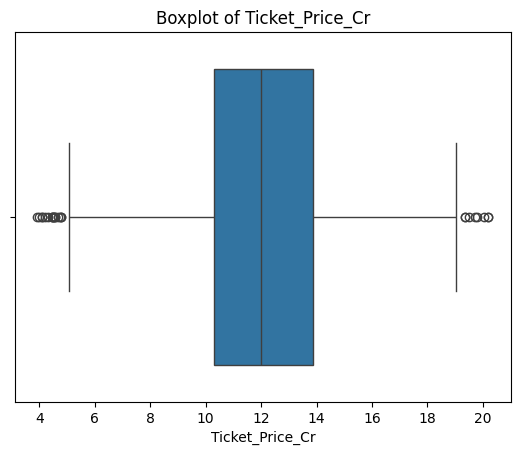

In [42]:
sns.boxplot(x=df_copy['Ticket_Price_Cr'].sample(2000, random_state=1))
plt.title("Boxplot of Ticket_Price_Cr")
plt.show()

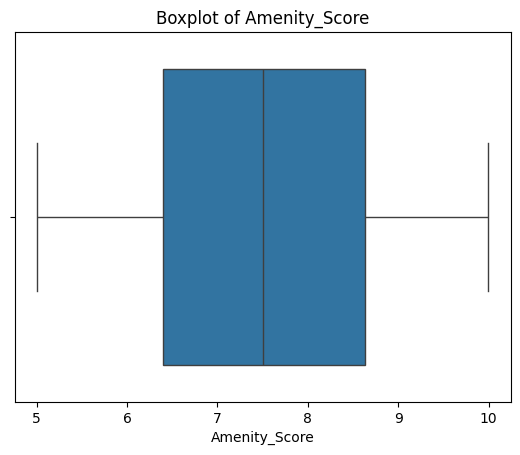

In [43]:
sns.boxplot(x=df_copy['Amenity_Score'].sample(2000, random_state=1))
plt.title("Boxplot of Amenity_Score")
plt.show()

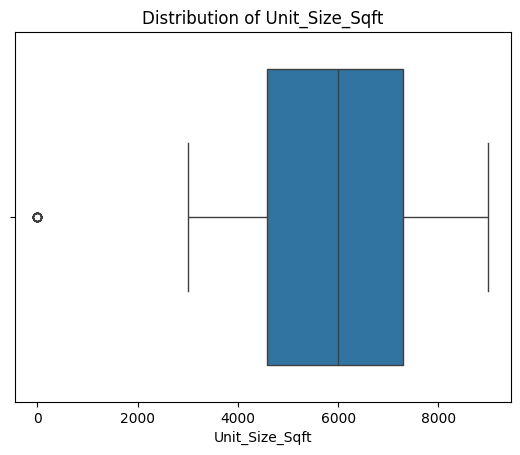

In [44]:
sns.boxplot(x=df_copy['Unit_Size_Sqft'].sample(2000, random_state=1))
plt.title("Distribution of Unit_Size_Sqft")
plt.show()

In [45]:
median_val = df_copy['Unit_Size_Sqft'].median()

df_copy.loc[df_copy['Unit_Size_Sqft'] < 0, 'Unit_Size_Sqft'] = median_val


In [46]:
from sqlalchemy import create_engine

connection_string = (
    "mssql+pyodbc://DESKTOP-C5AKQU5\\SQLEXPRESS/housingDB?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

engine = create_engine(connection_string)

print("Engine created successfully!")


Engine created successfully!


In [47]:
import sqlalchemy as sa
import pyodbc
import pandas as pd

conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-C5AKQU5\\SQLEXPRESS;"
    "DATABASE=housingDB;"
    "Trusted_Connection=yes;"
)

cursor = conn.cursor()
print("Connected to SQL Server!")
# Connection string for MSSQL
connection_string = (
    "mssql+pyodbc://DESKTOP-C5AKQU5\\SQLEXPRESS/housingDB?"
    "driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes"
)

engine = create_engine(connection_string)

print("Engine created successfully!")

# Insert state dataframe
df_copy.to_sql(
    "LuxuryHousing",
    con=engine,
    if_exists="append",
    index=False
)
print('connected to sql')

Connected to SQL Server!
Engine created successfully!


c:\Users\HP\OneDrive\Desktop\Guvi\2nd Project\env\Lib\site-packages\pandas\io\sql.py:1648: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  con = self.exit_stack.enter_context(con.connect())


PendingRollbackError: Can't reconnect until invalid transaction is rolled back.  Please rollback() fully before proceeding (Background on this error at: https://sqlalche.me/e/20/8s2b)